# Global Mean Response
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [2]:
%matplotlib notebook
!date

import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['hatch.color']='g'
import xarray as xr
from scipy.stats import ttest_1samp

from plotsetting import *
from geoplots import mapplot, xticksyear, xticksmonth
import geoxarray

Thu May  3 15:58:48 EDT 2018


In [3]:
# parameters
data_names = ['netrad_toa', 't_surf', 'precip']
figname = f'fig_globalMean.pdf'
prcp_scale = 3600 * 24

### Agung data

In [4]:
# Agung data
tsas_agung = dict()
for data_name in data_names:
    from data_CTL1860 import open_ensemble as get_ctl
    from data_agung import open_data as get_volcano
    volcano_name = 'Agung'
    year_volcano = 1963
    ens = range(1,31)
    nbname = 'volcano_impact_on_climate_agung.ipynb'
    new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

    ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
    try:
        da_ctl = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
        da_ctl.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    ncfile = f'cache/{nbname}.{data_name}.nc'
    try:
        da_volcano = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
        da_volcano.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    daa = da_volcano - da_ctl
    if data_name in ('precip',):
        daa = daa * prcp_scale
        
    tsas_agung[data_name] = dict()
    tsas_agung[data_name]['Global'] = daa.geo.fldmean()
    tsas_agung[data_name]['NH'] = daa.sel(lat=slice(0,90)).geo.fldmean()
    tsas_agung[data_name]['SH'] = daa.sel(lat=slice(-90,0)).geo.fldmean()

Data loaded from cache/volcano_impact_on_climate_agung.ipynb.netrad_toa.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.netrad_toa.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.t_surf.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.t_surf.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.precip.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.precip.nc


### StMaria data

In [5]:
# St Maria data
tsas_stmaria = dict()
for data_name in data_names:
    from data_CTL1860 import open_ensemble as get_ctl
    from data_stmaria import open_data as get_volcano
    volcano_name = 'StMaria'
    year_volcano = 1902
    ens = range(1,30+1)
    nbname = 'volcano_impact_on_climate_stmaria.ipynb'
    new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

    ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
    try:
        da_ctl = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
        da_ctl.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    ncfile = f'cache/{nbname}.{data_name}.nc'
    try:
        da_volcano = xr.open_dataarray(ncfile).load()
        print('Data loaded from', ncfile)
    except:
        da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
        da_volcano.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    daa = da_volcano - da_ctl
    if data_name in ('precip',):
        daa = daa * prcp_scale
    
    tsas_stmaria[data_name] = dict()
    tsas_stmaria[data_name]['Global'] = daa.geo.fldmean()
    tsas_stmaria[data_name]['NH'] = daa.sel(lat=slice(0,90)).geo.fldmean()
    tsas_stmaria[data_name]['SH'] = daa.sel(lat=slice(-90,0)).geo.fldmean()

Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.netrad_toa.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.netrad_toa.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.t_surf.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.t_surf.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.precip.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.precip.nc


### Plot

<IPython.core.display.Javascript object>


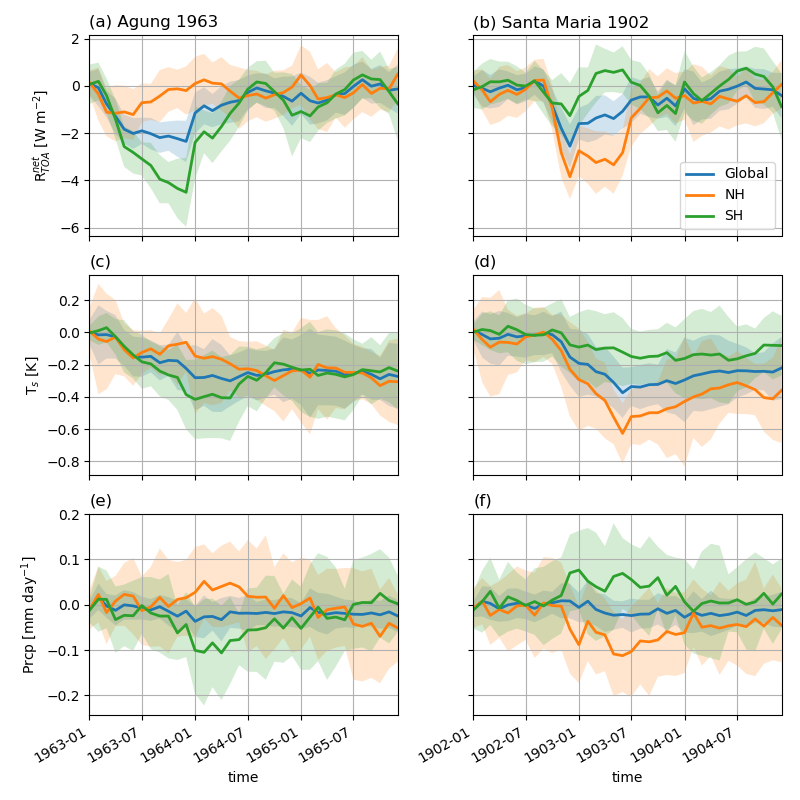

In [10]:
# plot
fill_alpha = 0.2

fig, axes = plt.subplots(3,2,figsize=(8,8), sharey='row', sharex='col')
# ############
plt.sca(axes[0,0])
data_name = 'netrad_toa'

ts = tsas_agung[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_agung[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_agung[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,6))
plt.xlim(['1963-01', '1965-12'])
plt.title('(a) Agung 1963', loc='left')
plt.ylabel('R$^{net}_{TOA}$ [W m$^{-2}$]')
plt.grid(True)

# ##########
plt.sca(axes[0,1])
data_name = 'netrad_toa'

ts = tsas_stmaria[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_stmaria[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_stmaria[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

plt.legend(loc='lower right', frameon=True)
xticksmonth(range(1,13,6))
plt.xlim(['1902-01', '1904-12'])
plt.title('(b) Santa Maria 1902', loc='left')
plt.grid(True)

# ############
plt.sca(axes[1,0])
data_name = 't_surf'

ts = tsas_agung[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_agung[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_agung[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,6))
plt.title('(c)', loc='left')
plt.ylabel('T$_s$ [K]')
plt.grid(True)

# ##########
plt.sca(axes[1,1])
data_name = 't_surf'

ts = tsas_stmaria[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_stmaria[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_stmaria[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,6))
plt.title('(d)', loc='left')
plt.grid(True)

# ############
plt.sca(axes[2,0])
data_name = 'precip'

ts = tsas_agung[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_agung[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_agung[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,6))
plt.title('(e)', loc='left')
plt.ylabel('Prcp [mm day$^{-1}$]')
plt.grid(True)

# ##########
plt.sca(axes[2,1])
data_name = 'precip'

ts = tsas_stmaria[data_name]['Global'] # global mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='Global')

ts = tsas_stmaria[data_name]['NH'] # NH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='NH')

ts = tsas_stmaria[data_name]['SH'] # SH mean
plt.fill_between(ts.time.to_index().to_pydatetime(),
               ts.mean('en') - ts.std('en'),
               ts.mean('en') + ts.std('en'),
               alpha=fill_alpha)
ts.mean('en').plot(label='SH')

xticksmonth(range(1,13,6))
plt.title('(f)', loc='left')
plt.grid(True)


plt.tight_layout()
plt.savefig(figname)